In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../input/survey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

Note to self: self_employed, state, work_interfere, and comments contain NaNs

Let's visualize the age of the survey participants.

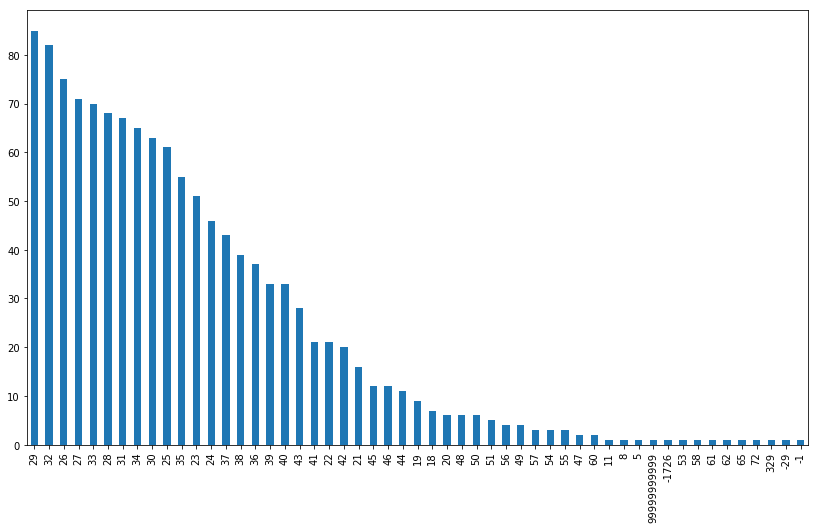

In [6]:
df['Age'].value_counts().plot(kind='bar', figsize=(14,8));

Let's get rid of some outliers.

In [7]:
df.query('Age <= 10 | Age >= 65')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
560,2014-08-27 19:17:07,65,Male,United States,FL,Yes,No,No,NaN,6-25,...,Very easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered
1182,2014-10-02 21:25:16,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,...,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN


In [8]:
df = df[df.Age > 18]

In [9]:
df = df[df.Age < 65]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1242 non-null object
Age                          1242 non-null int64
Gender                       1242 non-null object
Country                      1242 non-null object
state                        733 non-null object
self_employed                1224 non-null object
family_history               1242 non-null object
treatment                    1242 non-null object
work_interfere               983 non-null object
no_employees                 1242 non-null object
remote_work                  1242 non-null object
tech_company                 1242 non-null object
benefits                     1242 non-null object
care_options                 1242 non-null object
wellness_program             1242 non-null object
seek_help                    1242 non-null object
anonymity                    1242 non-null object
leave                        1242 non-null obj

In [11]:
df['Age'].mean()

32.09742351046699

The average age of the survey participant is 32 years.

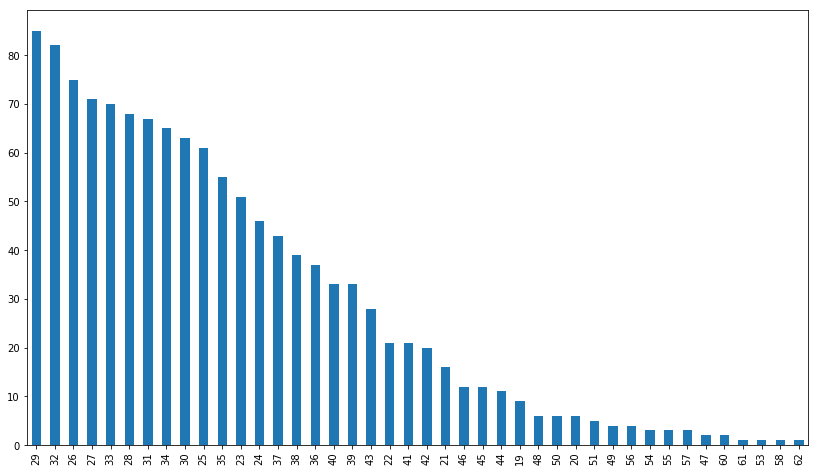

In [12]:
df['Age'].value_counts().plot(kind='bar',figsize=(14,8))

Out of curiosity, let's see where our participants are from.

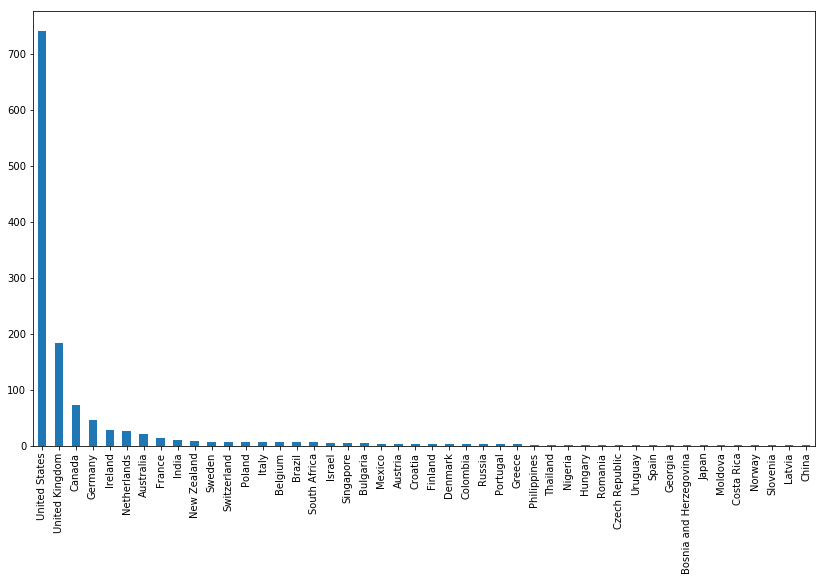

In [13]:
df['Country'].value_counts().plot(kind='bar',figsize=(14,8));

It seems like most are from North America and Europe. However, it doesn't seem like country will be a good factor in predicting whether someone has sought out treatment or not.

In [14]:
fam_history_pos = df[df.family_history == 'Yes']
fam_history_neg = df[df.family_history == 'No']

Let's see whether or not family history affected how the participant handled their mental health.

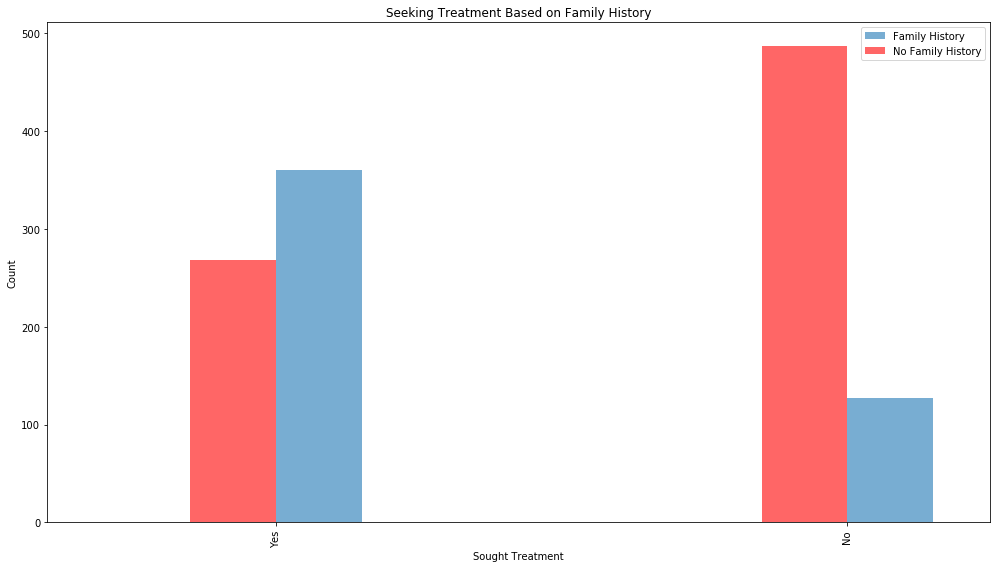

In [15]:
ax = fam_history_pos['treatment'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Family History', width=0.15, position = 0);
ax = fam_history_neg['treatment'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'No Family History', width= 0.15, position = 1, title='Seeking Treatment Based on Family History')
ax.set_xlabel("Sought Treatment")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

We can see from this graph, it seems that people with family history of mental health are a lot more likely to seek out treatment compared to those who have never had a family history.

More feature processing.

In [16]:
df['Gender'].value_counts()

Male                                              608
male                                              202
Female                                            119
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Man                                                 2
Cis Male                                            2
Female                                              2
Female (trans)                                      2
Cis Female                                          1
Enby                                                1
Malr                                                1
femail                      

In [17]:
male = ['Male ', 'male', 'male ', 'M', 'm', 'make', 'man', 'cis man', 'malr', 'mail', 'mal', 'Make', 'Male', 'Cis Male', 'Cis Man', 'Male (CIS)', 'male (cis)', 'Mal', 'ostensibly male, unsure what that really means', 'cis male', 'Malr', 'maile', 'msle', 'Mail', 'Man']
female = ['Female', 'female', 'female ', 'femake', 'cis female', 'F', 'f', 'Woman', 'Female ', 'cis-female/femme', 'Femake', 'Cis Female', 'femail', 'woman', 'Female (cis)', 'female (cis)']
trans_other = ['Nah','non-binary','Male-ish','trans-female','queer','Guy (-ish) ^_^','enby','Androgyne','neuter','queer/she/they','nah','Agender','Genderqueer','male leaning androgynous','fluid','trans woman','Female (trans)',"Trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "Enby", "fluid", "genderqueer", "Androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "Trans woman", "Neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"] 

In [18]:
df.Gender = df.Gender = df.Gender.replace(male, 'male')
df.Gender = df.Gender.replace(female, 'female')
df.Gender = df.Gender.replace(trans_other, 'trans/other')

In [19]:
df['Gender'].value_counts()

male           980
female         245
trans/other     17
Name: Gender, dtype: int64

In [20]:
gender_male = df[df.Gender == 'male']
gender_female = df[df.Gender == 'female']
gender_trans = df[df.Gender == 'trans/other']

In [21]:
gender_male['seek_help'].value_counts()

No            510
Don't know    283
Yes           187
Name: seek_help, dtype: int64

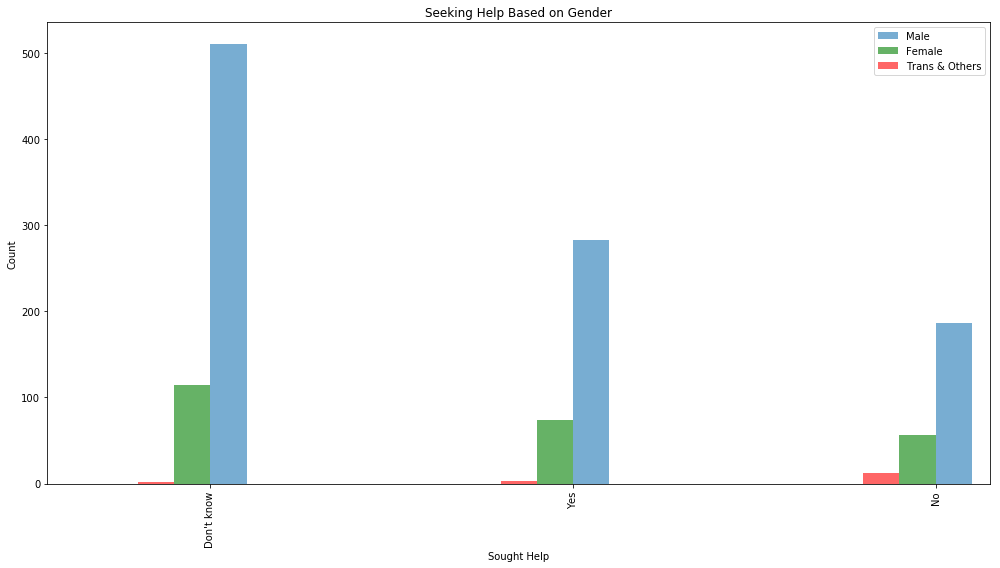

In [22]:
ax = gender_male['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Male', width=0.1, position = 0);
ax = gender_female['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Female', width=0.1, position = 1, color = 'g');
ax = gender_trans['seek_help'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'Trans & Others', width= 0.1, position = 2, title='Seeking Help Based on Gender')

ax.set_xlabel("Sought Help")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

Let's separate it to have a better look.

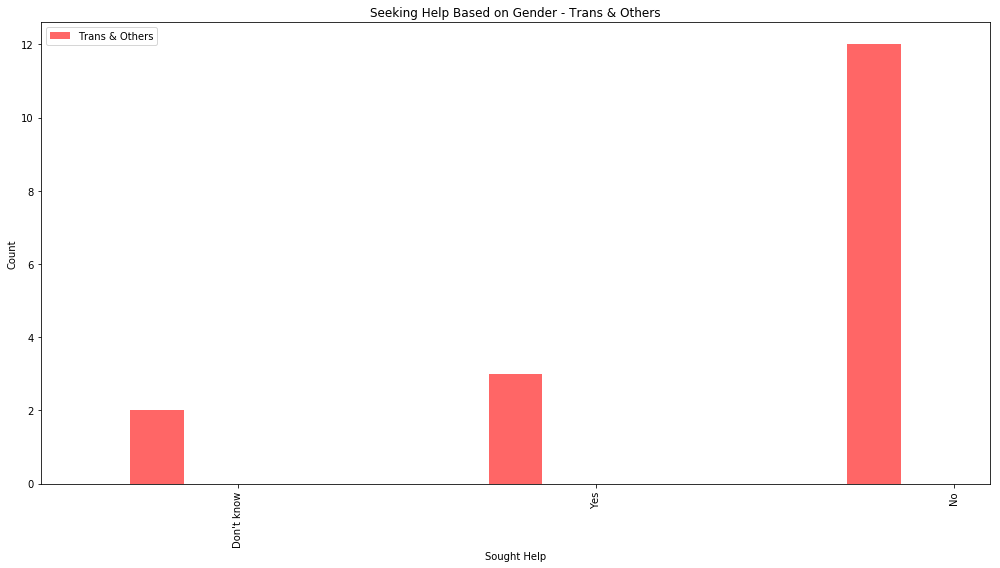

In [23]:
ax = gender_trans['seek_help'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'Trans & Others', width= 0.15, position = 2, title='Seeking Help Based on Gender - Trans & Others')
ax.set_xlabel("Sought Help")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

## random forest

In [24]:
df.drop('Timestamp',axis=1,inplace=True)
df.drop('self_employed',axis=1,inplace=True)
df.drop('work_interfere',axis=1,inplace=True)
df.drop('Country',axis=1,inplace=True)
df.drop('state',axis=1,inplace=True)

In [25]:
df.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,female,No,Yes,6-25,No,Yes,Yes,Not sure,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,male,No,No,More than 1000,No,No,Don't know,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,male,No,No,6-25,No,Yes,No,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,male,Yes,Yes,26-100,No,Yes,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,male,No,No,100-500,Yes,Yes,Yes,No,Don't know,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [26]:
comments = df['comments']
df.drop('comments',axis=1,inplace=True)

In [27]:
comments.dropna(inplace=True)
comments.head()

13    I'm not on my company's health insurance which...
15    I have chronic low-level neurological issues t...
16    My company does provide healthcare but not to ...
24                  Relatively new job. Ask again later
25    Sometimes I think  about using drugs for my me...
Name: comments, dtype: object

In [28]:
col_name = df.columns.values

In [29]:
le = LabelEncoder()

In [30]:
df.family_history = le.fit_transform(df.family_history) 
df.mental_health_consequence = le.fit_transform(df.mental_health_consequence)
df.phys_health_consequence = le.fit_transform(df.phys_health_consequence)
df.coworkers = le.fit_transform(df.coworkers)
df.supervisor = le.fit_transform(df.supervisor)
df.mental_health_interview = le.fit_transform(df.mental_health_interview)
df.phys_health_interview = le.fit_transform(df.phys_health_interview)
df.mental_vs_physical = le.fit_transform(df.mental_vs_physical)
df.obs_consequence = le.fit_transform(df.obs_consequence)
df.remote_work = le.fit_transform(df.remote_work)
df.tech_company = le.fit_transform(df.tech_company)
df.benefits = le.fit_transform(df.benefits)
df.care_options = le.fit_transform(df.care_options)
df.wellness_program = le.fit_transform(df.wellness_program)
df.seek_help = le.fit_transform(df.seek_help)
df.anonymity = le.fit_transform(df.anonymity)

In [31]:
df.loc[df['no_employees']=='1-5',['no_employees']]=1
df.loc[df['no_employees']=='6-25',['no_employees']]=2
df.loc[df['no_employees']=='26-100',['no_employees']]=3
df.loc[df['no_employees']=='100-500',['no_employees']]=4
df.loc[df['no_employees']=='500-1000',['no_employees']]=5
df.loc[df['no_employees']=='More than 1000',['no_employees']]=6

In [32]:
df['leave'].replace(['Very easy', 'Somewhat easy', "Don\'t know", 'Somewhat difficult', 'Very difficult'], [1, 2, 3, 4, 5],inplace=True) 

In [33]:
df.loc[df['Gender']=='male',['Gender']]=1
df.loc[df['Gender']=='female',['Gender']]=2
df.loc[df['Gender']=='trans/other',['Gender']]=3

In [34]:
df.head(5)

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,2,0,Yes,2,0,1,2,1,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,No,6,0,0,0,0,0,...,0,3,0,1,0,0,1,1,0,0
2,32,1,0,No,2,0,1,1,0,1,...,0,4,1,1,2,2,2,2,1,0
3,31,1,1,Yes,3,0,1,1,2,1,...,1,4,2,2,1,0,0,0,1,1
4,31,1,0,No,4,1,1,2,0,0,...,0,3,1,1,1,2,2,2,0,0


In [35]:
X = df.drop(['treatment'],axis=1)
y = df['treatment']
y = le.fit_transform(y) # yes:1 no:0

Splitting the testing set and training set 80/20.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
clf = RandomForestClassifier(max_depth=40,min_samples_split=10, n_estimators=50, random_state=1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [38]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [39]:
y_test

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [40]:
clf.predict_proba(X_train)[0:10]

array([[ 0.478423  ,  0.521577  ],
       [ 0.55071367,  0.44928633],
       [ 0.65428073,  0.34571927],
       [ 0.1939733 ,  0.8060267 ],
       [ 0.13650652,  0.86349348],
       [ 0.27682864,  0.72317136],
       [ 0.88767316,  0.11232684],
       [ 0.17328996,  0.82671004],
       [ 0.73455164,  0.26544836],
       [ 0.3739917 ,  0.6260083 ]])

In [41]:
list(zip(X_train,clf.feature_importances_))

[('Age', 0.12197204749863554),
 ('Gender', 0.053843357516784283),
 ('family_history', 0.17008497181377805),
 ('no_employees', 0.061076290981070709),
 ('remote_work', 0.023411559019147554),
 ('tech_company', 0.015265181019880433),
 ('benefits', 0.054155886000822953),
 ('care_options', 0.082666969473960544),
 ('wellness_program', 0.02803193784955722),
 ('seek_help', 0.034074065341961848),
 ('anonymity', 0.031322808137120843),
 ('leave', 0.068811324699112011),
 ('mental_health_consequence', 0.032643045252794642),
 ('phys_health_consequence', 0.029893012350381314),
 ('coworkers', 0.047682708370670387),
 ('supervisor', 0.03111398415044658),
 ('mental_health_interview', 0.021544092259565897),
 ('phys_health_interview', 0.031217308491657964),
 ('mental_vs_physical', 0.029071863757041939),
 ('obs_consequence', 0.032117586015609302)]

In [42]:
accuracy_score(y_test,clf.predict(X_test))

0.71887550200803207